In [1]:
import sys
sys.path.insert(1, '/content/drive/MyDrive/COVID-19-pooling') 

In [2]:
! pip install mip

In [3]:
import os
if not os.path.exists('./results'): 
    os.mkdir('./results')

In [4]:
from util import simulate_x
from test import test_RS
import numpy as np
import matplotlib.pyplot as plt
import json 

In [5]:
num_trials = 100

# Get Started
We will test the solver with the presence of errors. 

In the example, we will use the membership matrix used in [Efficient high-throughput SARS-CoV-2 testing to detect asymptomatic carriers](https://advances.sciencemag.org/content/6/37/eabc5961). 

Before running the cell below, first download the membership matrix from [this link](https://github.com/NoamShental/PBEST/blob/master/mFiles/poolingMatrix.mat) and put the file inside the './data/' folder. 

The design tests 384 individuals in 48 pools, such that each individual goes into 6 pools and each pool contains 48 individuals; the matrix is built using a Reed-Solomon error correcting code. 

On Nov. 13, positive rates in NY is shifted to 2.3%, corresponding to on average 384 * 2.3% = 8.8 positives among 384 individuals. 

In [6]:
# feel free to modify this cell 
n = 384
ks = list(range(1, 10))

In [7]:
for k in ks: 
  simulate_x(n, k/n, num_trials) 

On average, 0.97 positives in each trail.
On average, 2.02 positives in each trail.
On average, 2.94 positives in each trail.
On average, 4.09 positives in each trail.
On average, 5.11 positives in each trail.
On average, 5.76 positives in each trail.
On average, 6.79 positives in each trail.
On average, 8.12 positives in each trail.
On average, 8.76 positives in each trail.


# Noisy Measurements

Let's now test the performance of the solver using the pooling matrix in  [Efficient high-throughput SARS-CoV-2 testing to detect asymptomatic carriers](https://advances.sciencemag.org/content/6/37/eabc5961). 

Before running the cell below, first download the membership matrix from [this link](https://github.com/NoamShental/PBEST/blob/master/mFiles/poolingMatrix.mat) and put the file inside the './data/' folder.  

In [8]:
# feel free to modify this cell 

fpr = 0
fnrs = np.arange(0, 0.11, 0.01)

In [9]:
# get results 
results = {}
for fnr in fnrs:
    accuracy = []
    print("Starting fnr=%s ... " % fnr)
    for k in ks: 
        info = test_RS(k/384, fpr=fpr, fnr=fnr, num_trials=num_trials)
        accuracy.append(np.average(info["accuracy"]))
    results[fnr] = accuracy 

# save results 
with open("./results/noisy-measurements.txt", 'w') as outfile:
    json.dump(results, outfile) 

Starting fnr=0.0 ... 
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Starting fnr=0.01 ... 
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Starting fnr=0.02 ... 
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Starting fnr=0.03 ... 
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Starting fnr=0.04 ... 
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Finished trial 100
Starting fnr=0.05 ... 
Finished

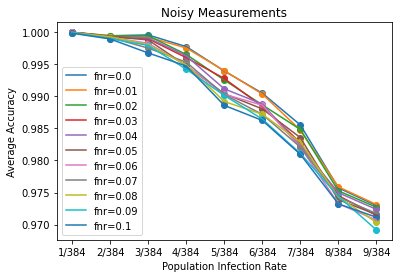

In [10]:
# plot 
fig, ax = plt.subplots() 

for fnr in fnrs: 
    accuracy = results[fnr]
    ax.scatter(ks, accuracy)
    ax.plot(ks, accuracy, label='fnr=%s'%fnr) 

ax.legend() 
labels = ["%s/384"%k for k in ks] 
plt.xticks(ks, labels) 
plt.title("Noisy Measurements")
plt.xlabel("Population Infection Rate")
plt.ylabel("Average Accuracy")

plt.savefig("noisy-measurements.png")
plt.show()